In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('passdata.csv',',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [5]:
data.shape

(669640, 2)

In [6]:
data

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [7]:
## Checking if there are any null values
data.isnull().mean()

password    0.000001
strength    0.000000
dtype: float64

In [8]:
##Dropping the null values
data = data.dropna()

In [9]:
data.isnull().mean()

password    0.0
strength    0.0
dtype: float64

In [10]:
data.describe()

,strength
count,669639.000000
mean,0.990198
std,0.507947
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [11]:
X = data['password']
y = data['strength']

In [12]:
X

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669635      10redtux10
669636       infrared1
669637    184520socram
669638       marken22a
669639        fxx4pw4g
Name: password, Length: 669639, dtype: object

In [13]:
y

0         1
1         1
2         1
3         1
4         1
         ..
669635    1
669636    1
669637    1
669638    1
669639    1
Name: strength, Length: 669639, dtype: int64

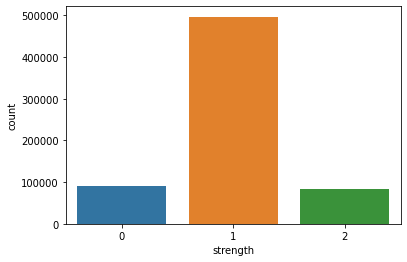

In [14]:
sns.countplot(data['strength'])

In [15]:
##Changing the inbuilt word split to character split
def word_to_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [16]:
## Transforming the data into tfidf form
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_to_char)
X=vectorizer.fit_transform(X)

In [17]:
X.shape

(669639, 153)

In [18]:
data.iloc[2,0]

'visi7k1yr'

In [19]:
feature_names = vectorizer.get_feature_names()

In [20]:
feature_names

['\x01',
 '\x02',
 '\x04',
 '\x05',
 '\x06',
 '\x08',
 '\x0e',
 '\x0f',
 '\x10',
 '\x11',
 '\x12',
 '\x13',
 '\x16',
 '\x17',
 '\x18',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¢',
 '¤',
 '¦',
 '§',
 '¨',
 '«',
 '¯',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '»',
 '¼',
 '½',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'í',
 'î',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 'ƒ',
 '—',
 '‚',
 '‡',
 '…',
 '‹',
 '›',
 '™']

In [21]:
##Checking the tfidf representation of a random word
pass1=X[3]
df = pd.DataFrame(pass1.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
z,0.448306
g,0.401046
y,0.390622
m,0.349833
3,0.339547
...,...
],0.000000
^,0.000000
_,0.000000
`,0.000000


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lgr=LogisticRegression(penalty='l2',multi_class='ovr')
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print(lgr.score(X_test,y_test))

0.813041335643032


In [26]:

## Multinomial
lgrm = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
lgrm.fit(X_train, y_train) #training
print(lgrm.score(X_test, y_test))

0.8206723015351532


In [27]:
X_predict=np.array(["%@123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=lgrm.predict(X_predict)
print(y_pred)

[1]


## Evaluation Metrics

In [28]:
from sklearn.metrics import f1_score

In [29]:
y_predl = lgrm.predict(X_test)

In [30]:
f1_score(y_test,y_predl,average='micro')

0.8206723015351531

In [31]:
f1_score(y_test,y_predl,average='weighted')

0.8035224118912295

##Saving the model

In [33]:
import pickle
pickle.dump(lgrm,open('lgrm.pkl','wb'))